In [5]:
import pandas as pd
import numpy as np
import nltk
import re
import matplotlib.pyplot as plt
import seaborn as sns

# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from textblob import TextBlob

[nltk_data] Downloading package punkt to /home/deepak/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/deepak/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/deepak/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [6]:
# Step 1: Load and Explore Dataset
file_path = '/home/deepak/dsciProject/new/half_song_lyrics.csv'

def load_and_explore_dataset(file_path):
    try:
        df = pd.read_csv(file_path, encoding='utf-8')
        print(f"Total entries: {len(df)}")
        print("\nLanguage Distribution:")
        print(df['language'].value_counts())
        print("\nGenre Distribution:")
        print(df['tag'].value_counts().head())
        df_english = df[df['language'] == 'en'].copy()
        print(f"\nEnglish lyrics count: {len(df_english)}")
        return df_english
    except Exception as e:
        print(f"Error: {e}")
        return None

df_english = load_and_explore_dataset(file_path)

Total entries: 1163

Language Distribution:
language
en    1056
fr       1
Name: count, dtype: int64

Genre Distribution:
tag
rap     1035
pop       12
rock       7
rb         5
misc       1
Name: count, dtype: int64

English lyrics count: 1056


In [7]:
# Step 2: Clean Lyrics
def clean_lyrics(text):
    if not isinstance(text, str):
        return ""
    text = text.lower()
    text = re.sub(r'\[.*?\]', '', text)
    text = re.sub(r'[^a-z\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

In [8]:
# Step 3: Remove Stopwords
def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    return ' '.join([word for word in word_tokens if word not in stop_words])

In [9]:
# Step 4: Preprocess Dataset
def preprocess_lyrics_dataset(df):
    df['cleaned_lyrics'] = df['lyrics'].apply(clean_lyrics)
    df['processed_lyrics'] = df['cleaned_lyrics'].apply(remove_stopwords)
    return df

if df_english is not None:
    df_processed = preprocess_lyrics_dataset(df_english)

In [10]:
# Step 5: Sentiment Analysis
def analyze_lyrics_sentiment(text):
    blob = TextBlob(text)
    polarity = blob.sentiment.polarity
    subjectivity = blob.sentiment.subjectivity
    sentiment = 'Positive' if polarity > 0.05 else 'Negative' if polarity < -0.05 else 'Neutral'
    return {'sentiment': sentiment, 'polarity': polarity, 'subjectivity': subjectivity}

df_processed['sentiment_analysis'] = df_processed['processed_lyrics'].apply(analyze_lyrics_sentiment)
df_processed['sentiment'] = df_processed['sentiment_analysis'].apply(lambda x: x['sentiment'])
df_processed['polarity'] = df_processed['sentiment_analysis'].apply(lambda x: x['polarity'])
df_processed['subjectivity'] = df_processed['sentiment_analysis'].apply(lambda x: x['subjectivity'])

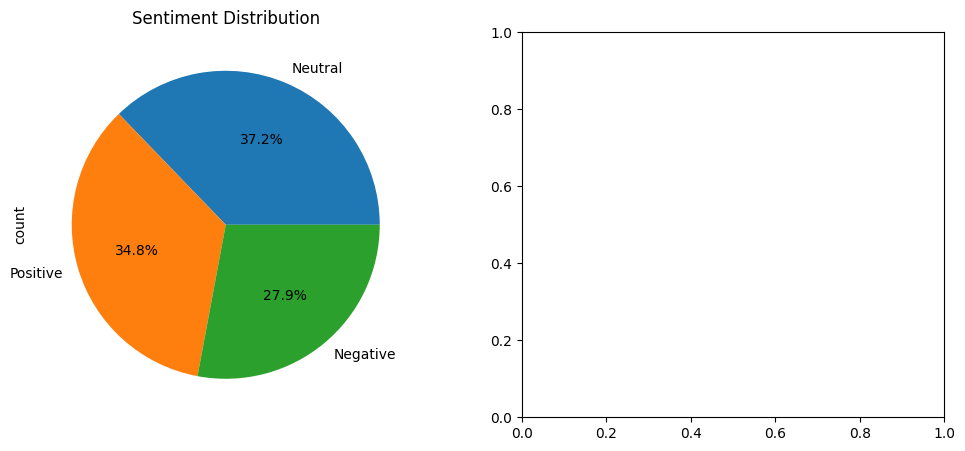

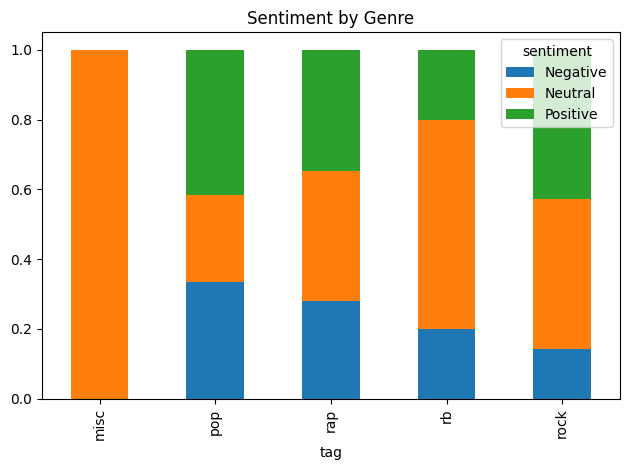

In [11]:
# Step 6: Visualization
def visualize_sentiment_distribution(df):
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    df['sentiment'].value_counts().plot(kind='pie', autopct='%1.1f%%')
    plt.title('Sentiment Distribution')
    plt.subplot(1, 2, 2)
    df.groupby('tag')['sentiment'].value_counts(normalize=True).unstack().plot(kind='bar', stacked=True)
    plt.title('Sentiment by Genre')
    plt.tight_layout()
    plt.show()

visualize_sentiment_distribution(df_processed)

In [12]:
# Save Processed Data
df_processed.to_csv('processed_genius_lyrics_dataset.csv', index=False)